In [1]:
import bia_bob
import pyclesperanto_prototype as cle
import stackview

In [2]:
import numpy as np  # Already imported modules should not be imported again
from skimage.data import cells3d

# Extract the nuclei channel (assuming channel 1 is the nuclei channel)
nuclei_channel = cells3d()[:, 1, :, :]

nuclei_channel.shape  # to verify the extraction

(60, 256, 256)

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
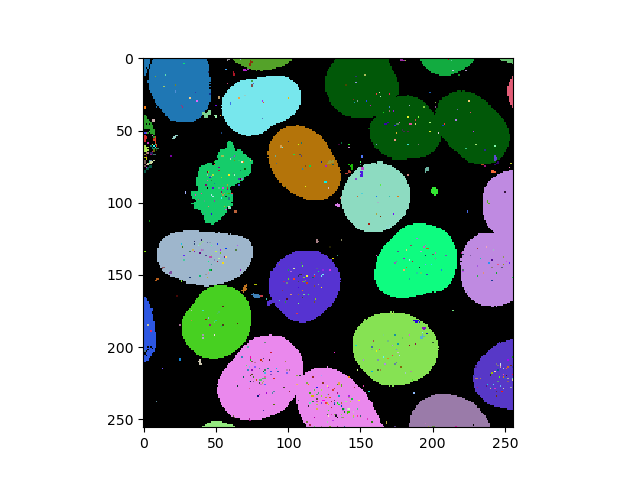

In [3]:
# Apply Otsu's threshold to create a binary image
binary_nuclei = cle.threshold_otsu(nuclei_channel)

# Perform connected component labeling
labeled_nuclei = cle.connected_components_labeling_box(binary_nuclei)

# Display the segmented label map
stackview.insight(labeled_nuclei)

In [4]:
import pandas as pd
from skimage.measure import regionprops_table

# Define properties to extract
properties = ['label', 'area', 'mean_intensity']

# Extract features
measurements = regionprops_table(np.asarray(labeled_nuclei), intensity_image=nuclei_channel, properties=properties)

# Store results in a DataFrame
df = pd.DataFrame(measurements)
df.head()  # To display the first few rows of the extracted features

,label,area,mean_intensity
0,1,27119.0,12862.000295
1,2,5.0,11143.800000
2,3,168.0,11268.273810
3,4,60.0,11758.683333
4,5,1.0,10527.000000


In [6]:
import stackview
stackview.clusterplot(df, labeled_nuclei, column_x="area", column_y="mean_intensity", image=nuclei_channel)